In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2
import pandas as pd
import random
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from keras.models import model_from_json
from imgaug import augmenters as ia
import imutils

Using TensorFlow backend.


In [0]:
data_dir = "/content/drive/My Drive/dataset/fakecurrency_realcurrency/fakecurrrency"

In [0]:
def main(): 
    i = 0
      
    for filename in os.listdir(data_dir): 
        dst = "r" + str(i) + ".jpg"
        src = data_dir + "/" + filename 
        dst = data_dir + "/" + dst 
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst) 
        i += 1
  
# Driver Code 
if __name__ == '__main__': 
      
    # Calling main() function 
    main() 

In [0]:
def load_img_steering():
    image_path=[]
    for i in range(10):
        image_path.append(os.path.join(data_dir+"/r"+str(i)+'.jpg'))
        
    #now once we get our list we will convrt it to numpy array so that they can be easily manipulated
    image_paths=np.asarray(image_path)
    return image_paths

image_paths=load_img_steering()

In [0]:
image=image_paths[1]
original_image=mpimg.imread(image)
original_image.shape

(2176, 4608, 3)

Text(0.5, 1.0, 'Original image')

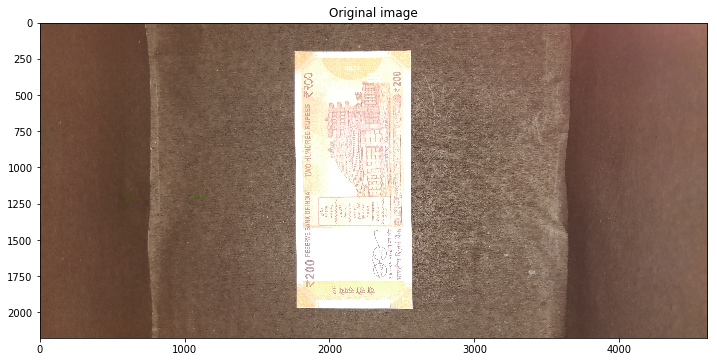

In [0]:
image=image_paths[6]
original_image=mpimg.imread(image)
fig,axs=plt.subplots(1,1,figsize=(10,10))
fig.tight_layout()
axs.imshow(original_image)
axs.set_title('Original image')

In [0]:
def img_preprocess(img):
    #we will read ths image path and store actual image that it contains
    #img=mpimg.imread(img)
    #now we will crop the unnecessary part from the image using slicing in numpy array
    #it contains height width and channel and we are only concerned with cropping the image height
    img=img[:,1500:3000,:]
    img_rotated=[]
    for angle in np.arange(0, 360, 15):
      rotated = imutils.rotate_bound(img, angle)
      #plt.imshow("Rotated (Correct)", rotated)
      img_rotated.append(rotated)  
    return img, img_rotated
    

Text(0.5, 1.0, 'Preprocessed image')

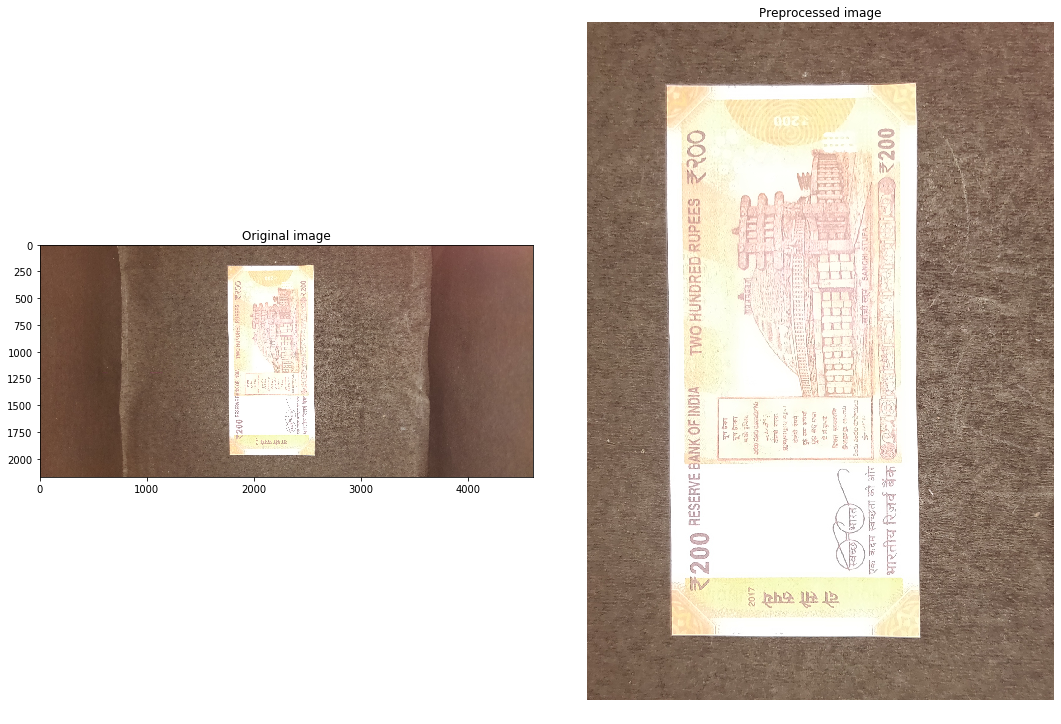

In [0]:
image=image_paths[6]
original_image=mpimg.imread(image)
preprocessed_image, rotated_imgs = img_preprocess(original_image)
fig,axs=plt.subplots(1,2,figsize=(15,10))
plt.axis('off')
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed image')

/content/drive/My Drive/dataset/fakecurrency_realcurrency/processed_images_real_currency/0.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/processed_images_real_currency/1.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/processed_images_real_currency/2.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/processed_images_real_currency/3.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/processed_images_real_currency/4.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/processed_images_real_currency/5.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/processed_images_real_currency/6.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/processed_images_real_currency/7.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/processed_images_real_currency/8.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/processed_images_real_currency/9.jpg
/content/drive/My Drive/dataset/fakecurrency_realc

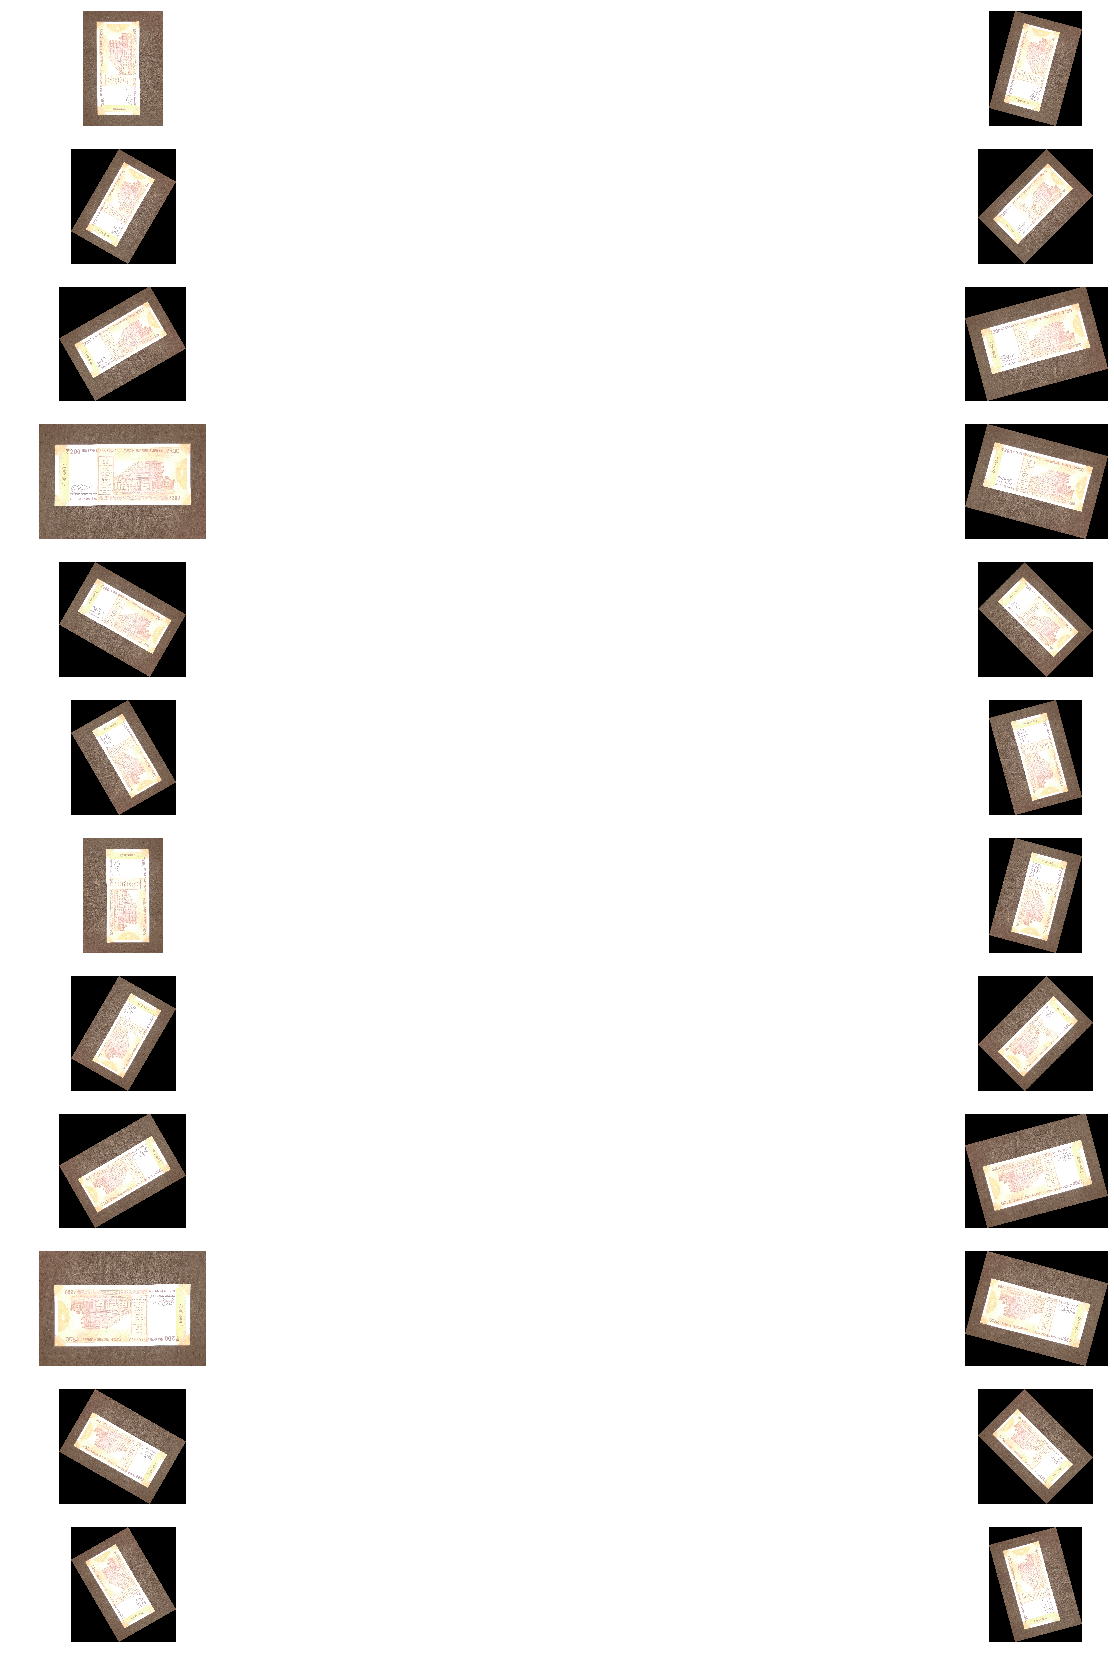

In [0]:
for i in range(0,len(rotated_imgs)):
  path_s="/content/drive/My Drive/dataset/fakecurrency_realcurrency/processed_images_real_currency/"+str(i)+'.jpg'
  cv2.imwrite(path_s,rotated_imgs[i])
  print(path_s)
  
len(rotated_imgs)

f, axarr = plt.subplots(12,2,figsize=(30,30))
fig.tight_layout()

c=0
for i in range(0,12):
  for j in range(0,2):
    axarr[i,j].imshow(rotated_imgs[c])
    axarr[i][j].axis('off')
    c=c+1

In [0]:
"""
We basically describe what happens to an image when the point of view is changed. For example, if you are standing right in front of a 
sheet of paper with a square drawn on it, it will look like a square. Now, if you start tilting that sheet of paper, the square will 
start looking more and more like a trapezoid. Projective transformations allow us to capture this dynamic in a nice mathematical way.
These transformations preserve neither sizes nor angles, but they do preserve incidence and cross-ratio.
"""

'\nWe basically describe what happens to an image when the point of view is changed. For example, if you are standing right in front of a \nsheet of paper with a square drawn on it, it will look like a square. Now, if you start tilting that sheet of paper, the square will \nstart looking more and more like a trapezoid. Projective transformations allow us to capture this dynamic in a nice mathematical way.\nThese transformations preserve neither sizes nor angles, but they do preserve incidence and cross-ratio.\n'

In [0]:
projective_transform_zoom_in=[]
for i in range(0,10):
  image=image_paths[i]
  img=mpimg.imread(image)
  noOfRows, noOfCols = img.shape[:2]
  print("Projective transformation started....") 
  for step in np.arange(0.005, 0.105, 0.005):
    srcPoints = np.float32([[int(step*(noOfCols-1)),int(step*(noOfRows-1))], [int((1-step)*(noOfCols-1)),int(step*(noOfRows-1))], [int(step*(noOfCols-1)),int((1-step)*(noOfRows-1))], [int((1-step)*(noOfCols-1)), int((1-step)*(noOfRows-1))]])
    dstPoints = np.float32([[0,0], [noOfCols-1,0], [0,noOfRows-1], [noOfCols-1,noOfRows-1]]) 
    projective_matrix = cv2.getPerspectiveTransform(srcPoints, dstPoints)
    imgZoomed = cv2.warpPerspective(img, projective_matrix, (noOfCols,noOfRows))
    projective_transform_zoom_in.append(imgZoomed)
  print("Done")
  break

Projective transformation started....
Done


/content/drive/My Drive/dataset/fakecurrency_realcurrency/zoomed_in_images_real_currency/0.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/zoomed_in_images_real_currency/1.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/zoomed_in_images_real_currency/2.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/zoomed_in_images_real_currency/3.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/zoomed_in_images_real_currency/4.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/zoomed_in_images_real_currency/5.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/zoomed_in_images_real_currency/6.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/zoomed_in_images_real_currency/7.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/zoomed_in_images_real_currency/8.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/zoomed_in_images_real_currency/9.jpg
/content/drive/My Drive/dataset/fakecurrency_realc

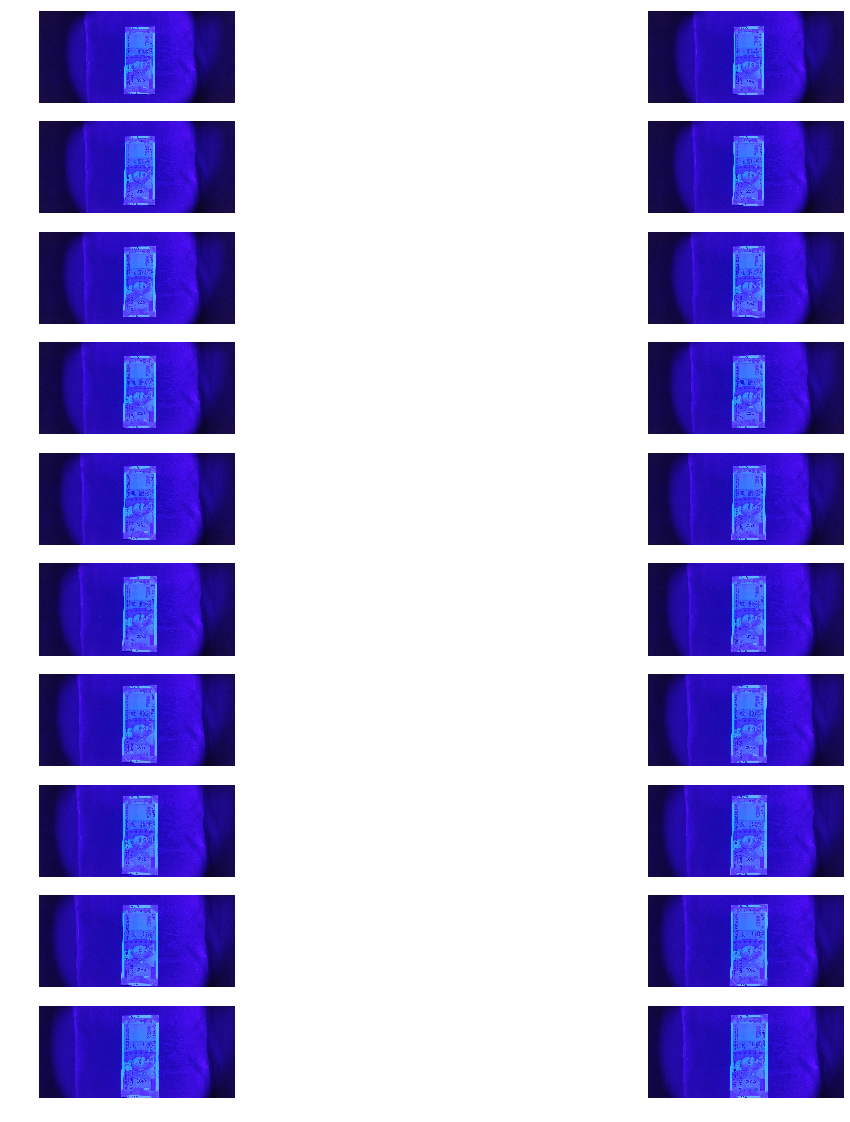

In [0]:
for i in range(0,len(projective_transform_zoom_in)):
  path_s="/content/drive/My Drive/dataset/fakecurrency_realcurrency/zoomed_in_images_real_currency/"+str(i)+'.jpg'
  cv2.imwrite(path_s,projective_transform_zoom_in[i])
  print(path_s)
  
len(projective_transform_zoom_in)
#20

f, axarr = plt.subplots(10,2,figsize=(20,20))
fig.tight_layout()

c=0
for i in range(0,10):
  for j in range(0,2):
    axarr[i,j].imshow(projective_transform_zoom_in[c])
    axarr[i][j].axis('off')
    c=c+1
    
print(projective_transform_zoom_in[0].shape)

In [0]:
projective_transform_zoom_out=[]
for i in range(0,10):
  image=image_paths[i]
  img=mpimg.imread(image)
  noOfRows, noOfCols = img.shape[:2]
  print("Projective transformation started....")
  for step in np.arange(0.005, 0.105, 0.005):
    srcPoints = np.float32(np.float32([[0,0], [noOfCols-1,0], [0,noOfRows-1], [noOfCols-1,noOfRows-1]]))
    dstPoints = np.float32([[int(step*(noOfCols-1)),int(step*(noOfRows-1))], [int((1-step)*(noOfCols-1)),int(step*(noOfRows-1))], [int(step*(noOfCols-1)),int((1-step)*(noOfRows-1))], [int((1-step)*(noOfCols-1)), int((1-step)*(noOfRows-1))]]) 
    projective_matrix = cv2.getPerspectiveTransform(srcPoints, dstPoints)
    imgZoomed = cv2.warpPerspective(img, projective_matrix, (noOfCols,noOfRows))
    projective_transform_zoom_out.append(imgZoomed)
  print("Done")
  break

Projective transformation started....
Done


/content/drive/My Drive/dataset/fakecurrency_realcurrency/zoomed_out_images_real_currency/0.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/zoomed_out_images_real_currency/1.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/zoomed_out_images_real_currency/2.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/zoomed_out_images_real_currency/3.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/zoomed_out_images_real_currency/4.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/zoomed_out_images_real_currency/5.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/zoomed_out_images_real_currency/6.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/zoomed_out_images_real_currency/7.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/zoomed_out_images_real_currency/8.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/zoomed_out_images_real_currency/9.jpg
/content/drive/My Drive/dataset/fakecurr

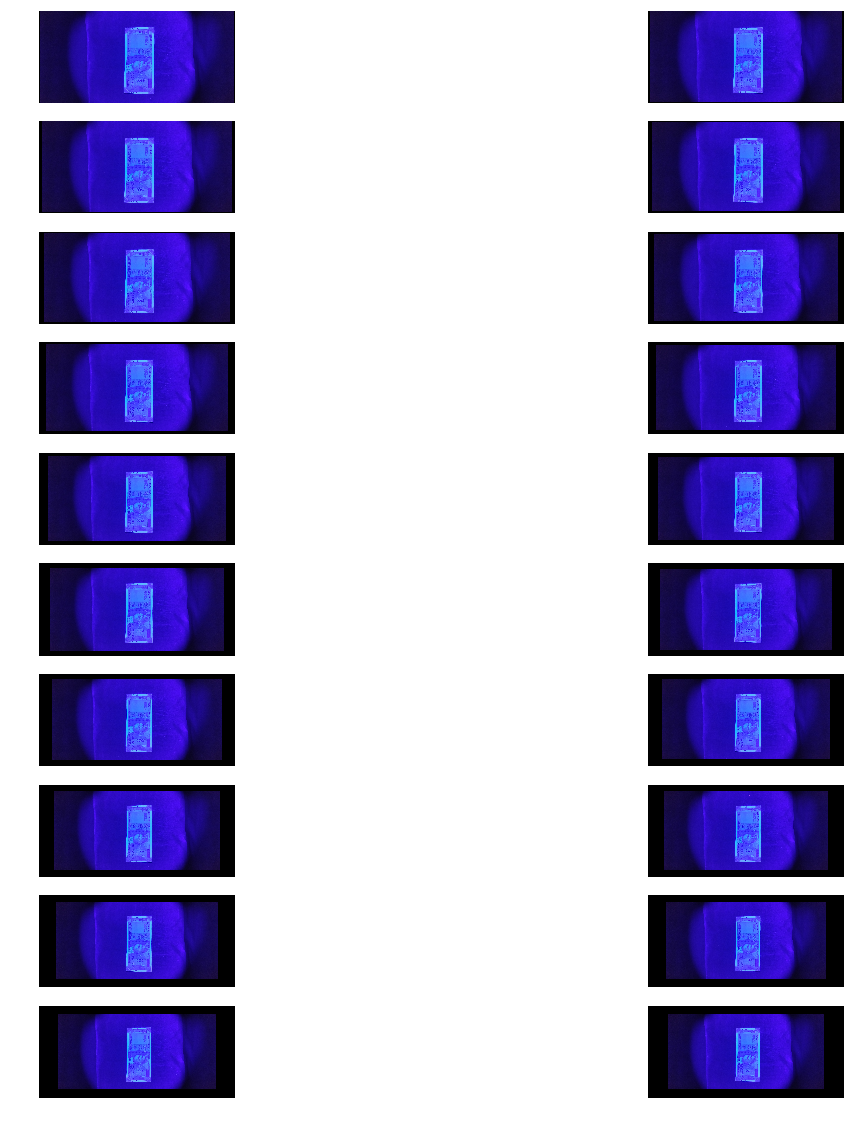

In [0]:
for i in range(0,len(projective_transform_zoom_out)):
  path_s="/content/drive/My Drive/dataset/fakecurrency_realcurrency/zoomed_out_images_real_currency/"+str(i)+'.jpg'
  cv2.imwrite(path_s,projective_transform_zoom_out[i])
  print(path_s)

len(projective_transform_zoom_out)
#20

f, axarr = plt.subplots(10,2,figsize=(20,20))
fig.tight_layout()

c=0
for i in range(0,10):
  for j in range(0,2):
    axarr[i,j].imshow(projective_transform_zoom_out[c])
    axarr[i][j].axis('off')
    c=c+1
    
print(projective_transform_zoom_out[0].shape)

In [0]:
if False in (projective_transform_zoom_out[0]==projective_transform_zoom_in[0]):
  print("Not same")
else:
  print("Same")

Not same


In [0]:
translated_img=[]
for i in range(0,10):
  image=image_paths[i]
  img=mpimg.imread(image)
  noOfRows, noOfCols = img.shape[:2]
  print("Translating...")
  for x in range(100, -110, -10):
    for y in range(100, -110, -10):
      translationMatrix = np.float32([ [1,0,x], [0,1,y] ])
      imgTrns = cv2.warpAffine(img, translationMatrix, (noOfCols, noOfRows))
      translated_img.append(imgTrns)
    break
  print("Done")
  break


Translating...
Done


/content/drive/My Drive/dataset/fakecurrency_realcurrency/translated_real_currency/0.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/translated_real_currency/1.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/translated_real_currency/2.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/translated_real_currency/3.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/translated_real_currency/4.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/translated_real_currency/5.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/translated_real_currency/6.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/translated_real_currency/7.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/translated_real_currency/8.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/translated_real_currency/9.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/translated_real_currency/10.jpg
/content/drive/My Dr

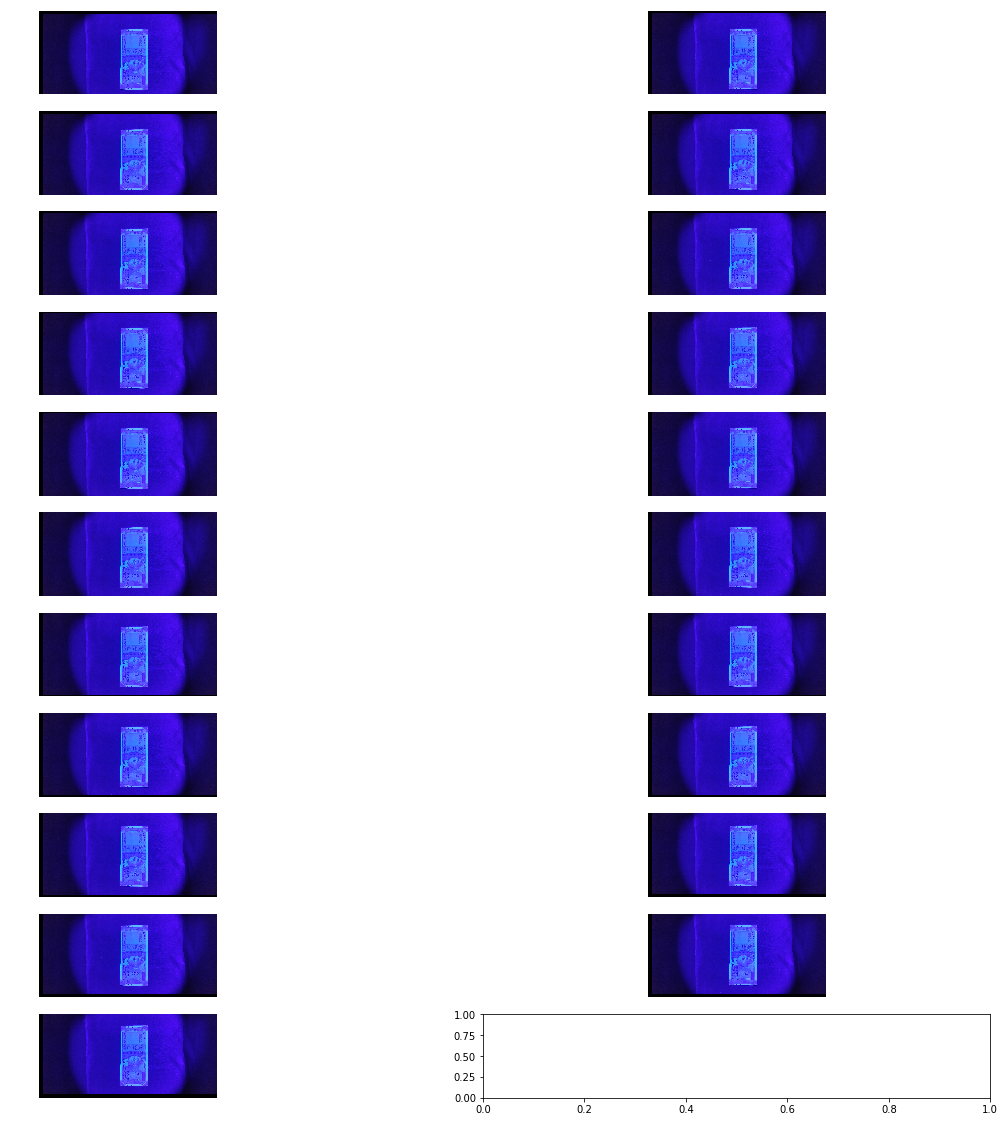

In [0]:
for i in range(0,len(projective_transform_zoom_out)):
  path_s="/content/drive/My Drive/dataset/fakecurrency_realcurrency/translated_real_currency/"+str(i)+'.jpg'
  cv2.imwrite(path_s,projective_transform_zoom_out[i])
  print(path_s)
  
len(translated_img)

f, axarr = plt.subplots(11,2,figsize=(20,20))
fig.tight_layout()

c=0
for i in range(0,11):
  for j in range(0,2):
    axarr[i,j].imshow(translated_img[c])
    axarr[i][j].axis('off')
    c=c+1
    if i==10 and j==0:
      break
      

In [0]:
class ShapeDetector:
	def __init__(self):
		pass
 
	def detect(self, c):
		# initialize the shape name and approximate the contour
		shape = "unidentified"
		peri = cv2.arcLength(c, True)
		approx = cv2.approxPolyDP(c, 0.04 * peri, True)
    
    # if the shape is a triangle, it will have 3 vertices
		if len(approx) == 3:
			shape = "triangle"
 
		# if the shape has 4 vertices, it is either a square or
		# a rectangle
		elif len(approx) == 4:
			# compute the bounding box of the contour and use the
			# bounding box to compute the aspect ratio
			(x, y, w, h) = cv2.boundingRect(approx)
			ar = w / float(h)
 
			# a square will have an aspect ratio that is approximately
			# equal to one, otherwise, the shape is a rectangle
			shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
 
		# if the shape is a pentagon, it will have 5 vertices
		elif len(approx) == 5:
			shape = "pentagon"
 
		# otherwise, we assume the shape is a circle
		else:
			shape = "circle"
 
		# return the name of the shape
		return shape



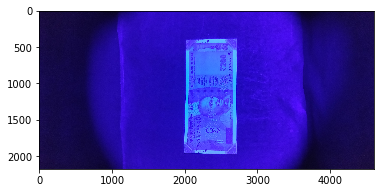

In [0]:
image=image_paths[0]
image=mpimg.imread(image)
plt.imshow(image)
  


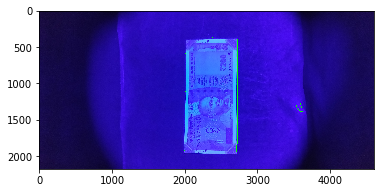

In [0]:

image=image_paths[0]
image=mpimg.imread(image)
resized = imutils.resize(image, width=300)
ratio = image.shape[0] / float(resized.shape[0])
 
# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 90, 255, cv2.THRESH_BINARY)[1]
 
# find contours in the thresholded image and initialize the
# shape detector
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = ShapeDetector()

# loop over the contours
for c in cnts:
	# compute the center of the contour, then detect the name of the
	# shape using only the contour
	M = cv2.moments(c)
	cX = int((M["m10"] / M["m00"]) * ratio)
	cY = int((M["m01"] / M["m00"]) * ratio)
	shape = sd.detect(c)
	# multiply the contour (x, y)-coordinates by the resize ratio,
	# then draw the contours and the name of the shape on the image
	c = c.astype("float")
	c *= ratio
	c = c.astype("int")
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
	#cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,10, (255, 255, 255), 5)
	x,y,w,h=cv2.boundingRect(np.array(c))
	plt.imshow(image)
  

(-0.5, 741.5, 1605.5, -0.5)

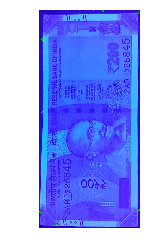

In [0]:
roi = image[y:y + h, x:x + w]
plt.imshow(roi)
plt.axis('off')

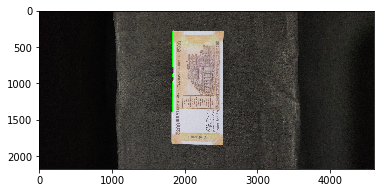

In [0]:
image=image_paths[3]
image=mpimg.imread(image)
resized = imutils.resize(image, width=300)
ratio = image.shape[0] / float(resized.shape[0])
 
# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 90, 255, cv2.THRESH_BINARY)[1]
 
# find contours in the thresholded image and initialize the
# shape detector
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = ShapeDetector()

# loop over the contours
for c in cnts:
  M = cv2.moments(c)
  if M["m00"]!=0:
    cX = int(M["m10"]/M["m00"])
    cY = int(M["m01"]/M["m00"])
  else:
    cX,cY = 0,0
  shape=sd.detect(c)
  
  c=c.astype("float")
  c*=ratio
  c=c.astype("int")
  cv2.drawContours(image, [c], -1, (0,255,0),2)
  x,y,w,h=cv2.boundingRect(np.array(c))
  plt.imshow(image)

In [0]:
len(image_paths)

10

(-0.5, 725.5, 1559.5, -0.5)

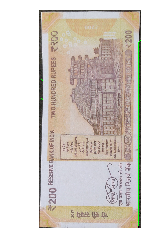

In [0]:
roi = image[y:y + h, x:x + w]
plt.imshow(roi)
plt.axis('off')